In [1]:
#Step 1
import numpy as np
import pandas as pd
Income_KNN = pd.read_excel(r"D:\Income_D7.xlsx")
Income_KNN.head()

,Age,WorkClass,Final_Weight,Education,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [2]:
Income_KNN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48842 non-null  int64 
 1   WorkClass       48842 non-null  object
 2   Final_Weight    48842 non-null  int64 
 3   Education       48842 non-null  int64 
 4   Marital_Status  48842 non-null  object
 5   Occupation      48842 non-null  object
 6   Relationship    48842 non-null  object
 7   Race            48842 non-null  object
 8   Gender          48842 non-null  object
 9   Capital_Gain    48842 non-null  int64 
 10  Capital_Loss    48842 non-null  int64 
 11  Hours_Per_Week  48842 non-null  int64 
 12  Native_Country  48842 non-null  object
 13  Income          48842 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [3]:
#Creating dummies for Categories
Income_KNN =pd.get_dummies(Income_KNN,columns=["WorkClass","Education","Marital_Status","Occupation","Relationship","Race","Gender","Native_Country"],dtype=float)
Income_KNN

,Age,Final_Weight,Capital_Gain,Capital_Loss,Hours_Per_Week,Income,WorkClass_?,WorkClass_Federal-gov,WorkClass_Local-gov,WorkClass_Never-worked,...,Native_Country_Portugal,Native_Country_Puerto-Rico,Native_Country_Scotland,Native_Country_South,Native_Country_Taiwan,Native_Country_Thailand,Native_Country_Trinadad&Tobago,Native_Country_United-States,Native_Country_Vietnam,Native_Country_Yugoslavia
0,25,226802,0,0,40,<=50K,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,38,89814,0,0,50,<=50K,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,28,336951,0,0,40,>50K,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,44,160323,7688,0,40,>50K,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,18,103497,0,0,30,<=50K,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,0,0,38,<=50K,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48838,40,154374,0,0,40,>50K,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48839,58,151910,0,0,40,<=50K,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48840,22,201490,0,0,20,<=50K,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [4]:
#Mapping income variable 
from re import I
Income_Mapping ={">50K":1,"<=50K":0}
Income_KNN['Income'] = Income_KNN['Income'].replace(Income_Mapping)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15980\4085476778.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Income_KNN['Income'] = Income_KNN['Income'].replace(Income_Mapping)


In [5]:
#Shuffling of values to increase accuracy
from sklearn.utils import shuffle
df_shuffled = shuffle(Income_KNN,random_state = 42)
df_shuffled

,Age,Final_Weight,Capital_Gain,Capital_Loss,Hours_Per_Week,Income,WorkClass_?,WorkClass_Federal-gov,WorkClass_Local-gov,WorkClass_Never-worked,...,Native_Country_Portugal,Native_Country_Puerto-Rico,Native_Country_Scotland,Native_Country_South,Native_Country_Taiwan,Native_Country_Thailand,Native_Country_Trinadad&Tobago,Native_Country_United-States,Native_Country_Vietnam,Native_Country_Yugoslavia
7762,56,33115,0,0,40,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23881,25,112847,0,0,40,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30507,43,170525,14344,0,40,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28911,32,186788,0,0,40,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19484,39,277886,0,0,30,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,36,635913,0,0,40,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
44732,34,107624,0,0,50,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
38158,28,250135,0,0,40,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
860,46,96652,0,0,40,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [6]:
#Defining Independent and Dependent Variables
from sklearn.model_selection import train_test_split
X=df_shuffled.drop("Income",axis=1)
y=df_shuffled["Income"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("Training set shape:",X_train.shape,y_train.shape)
print("Testing set shape:",X_test.shape,y_test.shape)

Training set shape: (39073, 107) (39073,)
Testing set shape: (9769, 107) (9769,)


In [7]:
#KNN Model accuracy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_classifier =KNeighborsClassifier(n_neighbors = 3)
knn_classifier.fit(X_train,y_train)
y_preds = knn_classifier.predict(X_test.values)
accuracy = accuracy_score(y_test,y_preds)
print(f"Accuracy:{accuracy}")


D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy:0.7654826491964377


In [8]:
#Running KNN for various values
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn_r_acc=[]
for i in range(1,17,1):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    test_score=knn.score(X_test,y_test)
    train_score=knn.score(X_train,y_train)
    knn_r_acc.append((i,test_score,train_score))
df=pd.DataFrame(knn_r_acc,columns=['K','Test Score','Train Score'])
print(df)

     K  Test Score  Train Score
0    1   -0.463636     0.999581
1    2   -0.133439     0.640916
2    3   -0.025230     0.505177
3    4    0.021975     0.428934
4    5    0.054472     0.380017
5    6    0.076259     0.346283
6    7    0.086581     0.322806
7    8    0.094642     0.304679
8    9    0.104222     0.288427
9   10    0.109987     0.275476
10  11    0.114386     0.266643
11  12    0.113868     0.256530
12  13    0.115453     0.248663
13  14    0.117130     0.242025
14  15    0.119729     0.236265
15  16    0.122184     0.231402


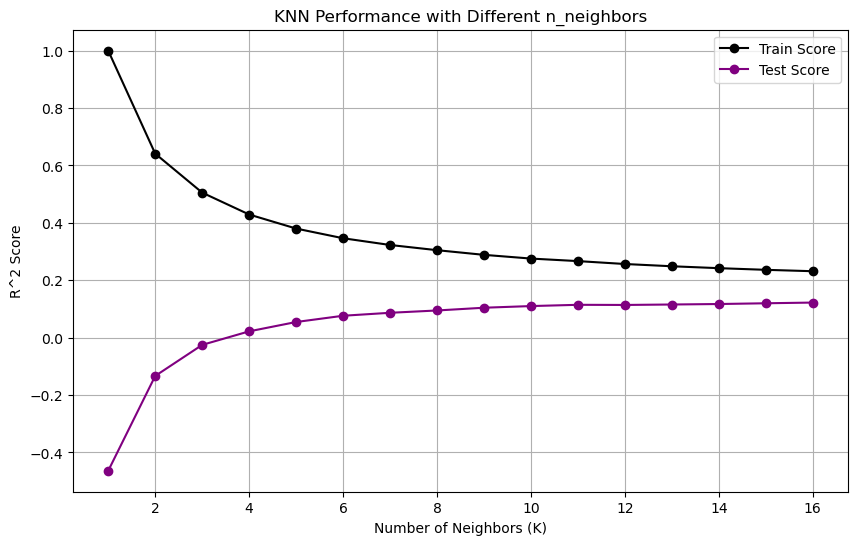

In [9]:
#Step-8 - KNN Performance

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df['K'],df['Train Score'],label='Train Score',marker='o',color='black')
plt.plot(df['K'],df['Test Score'],label='Test Score',marker='o',color='purple')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('R^2 Score')
plt.title('KNN Performance with Different n_neighbors')
plt.legend()
plt.grid(True)
plt.show()

Test Score vs. K

Starting Trend: The test score starts at a low negative value (-0.464) when K is 1. This indicates poor model performance, likely due to overfitting. With K=1, the model may be too sensitive to individual data points.

Improvement: As K increases, the test score improves and becomes positive. This suggests that as more neighbors are considered, the model starts generalizing better and reduces the impact of noise or outliers.

Steady Increase: The test score steadily increases as K goes from 2 to 16, reaching a maximum value of approximately 0.122. This indicates that the model's performance on unseen data improves with larger K values, which typically means better generalization.